In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg as LA
import time
%matplotlib notebook
%matplotlib inline

In [2]:
alpha_l = 0.
alpha_h = 1.
alpha = np.linspace(alpha_l, alpha_h,101)
print alpha

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [3]:
def rb_grad(x):
    df1 = 400.*x[0]*(x[0]**2-x[1])+2.*(x[0]-1.)
    df2 = 200.*(x[1]-x[0]**2.)
    grad = np.array([df1,df2])
    return grad    

In [4]:
def hess(x):
    h11 = 1200.*x[0]**2.-400.*x[1]+2.
    h12 = -400.*x[0]
    h21 = -400.*x[0]
    h22 = 200.
    hess = np.array([[h11,h12],[h21,h22]])
    return hess

In [5]:
def invhess(x):
    invhess = LA.solve(hess(x),rb_grad(x))
    return invhess

In [7]:
x = [1.2,1.2]
pd = -rb_grad(x)/(LA.norm(rb_grad(x)))

In [8]:
x = [1.2,1.2]
pn = -invhess(x)

In [9]:
def phi_descent(alpha):
    phi_d = 100.*(x[1]+alpha*pd[1]-x[0]-alpha*pd[0])**2. + (1.-x[0]-alpha*pd[0])**2.
    return phi_d

In [10]:
def phiprime_descent(alpha):
    phiprime_d = 200.*((pd[1]-pd[0])*(x[1]-x[0])+alpha*(pd[1]-pd[0]))
    return phiprime_d

In [14]:
def phi_newton(alpha):
    phi_n = 100.*(x[1]+alpha*pn[1]-x[0]-alpha*pn[0])**2. + (1.-x[0]-alpha*pn[0])**2.
    return phi_n

In [15]:
def phiprime_newton(alpha):
    phiprime_n = 200.*((pn[1]-pn[0])*(x[1]-x[0])+alpha*(pn[1]-pn[0]))
    return phiprime_n

In [153]:
print phi_descent(alpha_l)
print phi_descent(alpha_h)
print phiprime_descent(alpha_l)
print phiprime_descent(alpha_h)

0.03999999999999998
171.35613305607328
0.0
261.40589890902703


In [11]:
def H3_descent(alpha):
    H3 = ((1.+2.*((alpha-alpha_l)/(alpha_h-alpha_l)))*(((alpha_h-alpha)/(alpha_h-alpha_l))**2.)*phi_descent(alpha_l)
         +(1.+2.*((alpha_h-alpha)/(alpha_h-alpha_l)))*(((alpha-alpha_l)/(alpha_h-alpha_l))**2.)*phi_descent(alpha_h)
         +(alpha-alpha_l)*(((alpha_h-alpha)/(alpha_h-alpha_l))**2.)*phiprime_descent(alpha_l)+
         +(alpha-alpha_h)*(((alpha-alpha_l)/(alpha_h-alpha_l))**2.)*phiprime_descent(alpha_h))    
    return H3

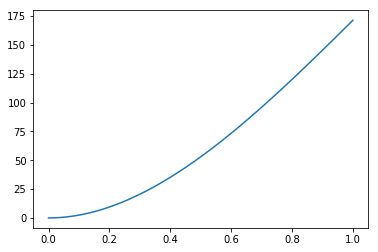

In [12]:
plt.plot(alpha,H3_descent(alpha))

In [13]:
d1 = phiprime_descent(alpha_l)+phiprime_descent(alpha_h)-3.*((phi_descent(alpha_l)-phi_descent(alpha_h))/(alpha_l-alpha_h))
d2 = np.sign(alpha_h-alpha_l)*np.sqrt(np.abs(d1**2.-(phiprime_descent(alpha_l)*phiprime_descent(alpha_h))))
alpha_kp1 = alpha_h-((alpha_h-alpha_l)*((phiprime_descent(alpha_h)+d2-d1)/(phiprime_descent(alpha_h)-phiprime_descent(alpha_l)+2.*d2)))
print alpha_kp1

0.0


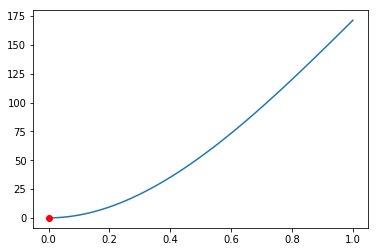

In [161]:
plt.plot(alpha,H3_descent(alpha))
plt.plot(alpha_kp1,'ro',linewidth=2)

In [16]:
def H3_newton(alpha):
    H3n = ((1.+2.*((alpha-alpha_l)/(alpha_h-alpha_l)))*(((alpha_h-alpha)/(alpha_h-alpha_l))**2.)*phi_newton(alpha_l)
         +(1.+2.*((alpha_h-alpha)/(alpha_h-alpha_l)))*(((alpha-alpha_l)/(alpha_h-alpha_l))**2.)*phi_newton(alpha_h)
         +(alpha-alpha_l)*(((alpha_h-alpha)/(alpha_h-alpha_l))**2.)*phiprime_newton(alpha_l)+
         +(alpha-alpha_h)*(((alpha-alpha_l)/(alpha_h-alpha_l))**2.)*phiprime_newton(alpha_h))    
    return H3n

In [17]:
d1 = phiprime_newton(alpha_l)+phiprime_newton(alpha_h)-3.*((phi_newton(alpha_l)-phi_newton(alpha_h))/(alpha_l-alpha_h))
d2 = np.sign(alpha_h-alpha_l)*np.sqrt(np.abs(d1**2.-(phiprime_newton(alpha_l)*phiprime_newton(alpha_h))))
alpha_kp1 = alpha_h-((alpha_h-alpha_l)*((phiprime_newton(alpha_h)+d2-d1)/(phiprime_newton(alpha_h)-phiprime_newton(alpha_l)+2.*d2)))
print alpha_kp1

0.5647158271900478
